In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os 
import time

2023-01-30 16:34:41.972614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 16:34:42.128141: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-30 16:34:42.128176: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-30 16:34:42.876785: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
(train_data,train_labels),(test_data,test_labels) = keras.datasets.cifar10.load_data()

In [3]:
train_data.shape

(50000, 32, 32, 3)

In [4]:
Class_names = ['aitplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
validation_data , validation_label = train_data[:5000],train_data[:5000]
validation_data.shape

(5000, 32, 32, 3)

In [6]:
train_data , train_labels = train_data[5000:],train_labels [5000:]

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data,train_labels))

2023-01-30 16:35:05.092803: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-30 16:35:05.092839: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-30 16:35:05.092876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sobhanfbouna): /proc/driver/nvidia/version does not exist
2023-01-30 16:35:05.093353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 16:35:05.576569: W tensorflow/tsl/framework/cpu_allocator_im

In [8]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,test_labels))

In [9]:
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_data,validation_label))

2023-01-30 16:35:19.149002: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.


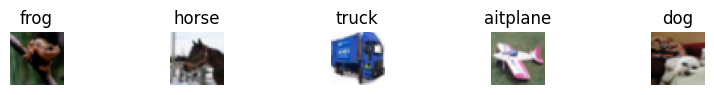

In [10]:
plt.figure(figsize=(10,4))
for i,(data,label) in enumerate(train_dataset.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(data)
    plt.title(Class_names[label.numpy()[0]])
    plt.axis('off')

In [11]:
def process_image(image,label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image,(277,277))
    return image,label

In [12]:
train_ds_size = tf.data.experimental.cardinality(train_dataset).numpy()
test_ds_size = tf.data.experimental.cardinality(test_dataset).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_dataset).numpy()
print('train dataset size : ',train_ds_size)
print('test datasdet size : ' ,test_ds_size)
print('validation dataset : ',validation_ds_size)

train dataset size :  45000
test datasdet size :  10000
validation dataset :  5000


In [13]:
train_ds = (train_dataset
            .map(process_image)
            .shuffle(buffer_size=train_ds_size)
            .batch(batch_size=32 , drop_remainder=True))
test_dataset = (test_dataset
            .map(process_image)
            .shuffle(buffer_size=train_ds_size)
            .batch(batch_size=32,drop_remainder=True))
validation_ds = (validation_dataset
            .map(process_image)
            .shuffle(buffer_size=train_ds_size)
            .batch(batch_size=32,drop_remainder=True))

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

2023-01-30 16:35:37.922433: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2023-01-30 16:35:38.022781: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.
2023-01-30 16:35:38.050892: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150994944 exceeds 10% of free system memory.


In [15]:
tensorboard_cb = keras.callbacks.TensorBoard()

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [25]:
#model.fit(train_dataset,
 #         epochs=10,
  #        validation_data=validation_dataset,
   #       validation_freq=1,
    #      callbacks=[tensorboard_cb])

In [26]:
#model.evaluate(test_dataset)